## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

We would like to predict the price of a used car depeding on its specifications.

Brand: A BMW is generally more expensive than a Toyota.

Mileage: The more a car is driven, the cheaper it should be.

EngineV: Sports cars have larger engines than economy cars.

Year: The older the car, the cheaper it is.

In [2]:
raw_data = pd.read_csv('Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

We only get descriptives for numerical variables (by default) by describe()

In [3]:
# describe including categorical variables.
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interest

A lot of the information from 'Model' could be engineered from 'Brand', 'Year', and 'EngineV' so we wont be losing too much variability

DataFrame.drop(columns,axis) = returns new object with the indicated columns dropped.

Axis 0 mean rows and Axis 1 means columns

In [4]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

Price and EngineV have 172 and 150 missing value repectively.

In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

Rule of thumb: if you are removing <5% of the observations, you are ree to just remove all that have MV.

In [6]:
# droping the oversvation which row have the missing values 
# and return the no missing value observation.
data_no_mv = data.dropna(axis=0)

In [7]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


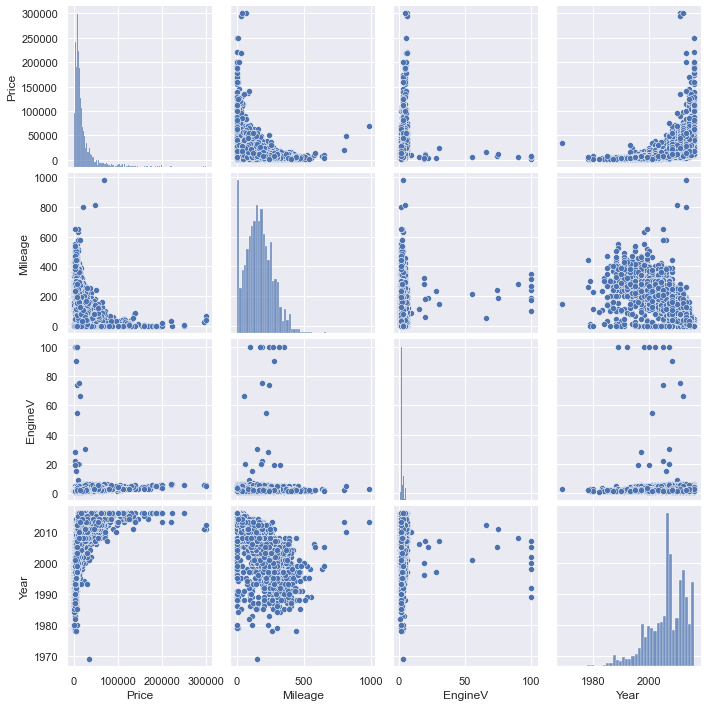

In [8]:
sns.pairplot(data_no_mv)

#### Correlation

In [9]:
data_no_mv.corr()

,Price,Mileage,EngineV,Year
Price,1.000000,-0.473523,0.058664,0.485734
Mileage,-0.473523,1.000000,0.024935,-0.664573
EngineV,0.058664,0.024935,1.000000,-0.030321
Year,0.485734,-0.664573,-0.030321,1.000000


<AxesSubplot:>

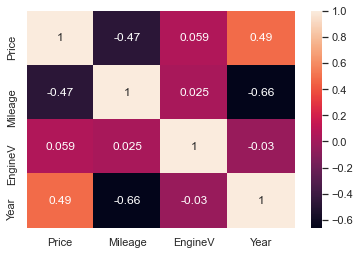

In [10]:
sns.heatmap(data_no_mv.corr(), annot=True)

### Exploring the PDFs

For optimal results wee would be looking for a normal distribution.

we have a few outliers in the 'Price' variable

outliers= observations that lie on abnormal distance from other observations in the data.

C:\Users\Protick\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

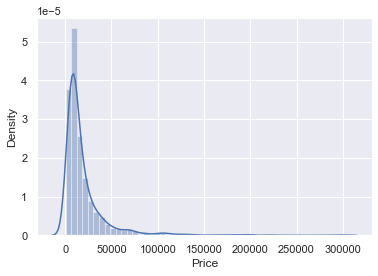

In [11]:
sns.distplot(data_no_mv['Price'])

### Dealing with outliers

one way to deal with outliers seemlessly is to remove top 1%  of observations.

DataFrame.quantile(the quantile) return the value at the given quantile (=np.percentile)

In [12]:
q = data_no_mv['Price'].quantile(0.98)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3943,3943.000000,3943,3943.000000,3943.000000,3943,3943,3943.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1515,NaN,NaN,1818,3572,NaN
mean,NaN,16840.689820,NaN,166.739538,2.738415,NaN,NaN,2006.197312
std,NaN,16332.966734,NaN,102.042365,4.980975,NaN,NaN,6.640292
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6900.000000,NaN,95.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,11250.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,20800.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\Protick\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

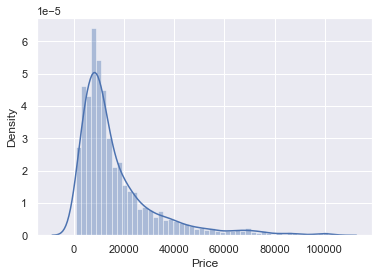

In [13]:
sns.distplot(data_1['Price'])

C:\Users\Protick\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

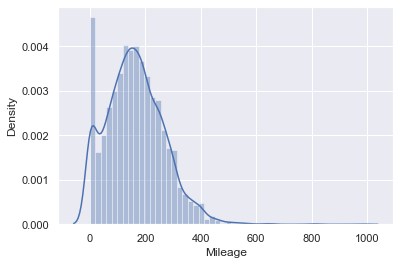

In [14]:
sns.distplot(data_no_mv['Mileage'])

In [15]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

C:\Users\Protick\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

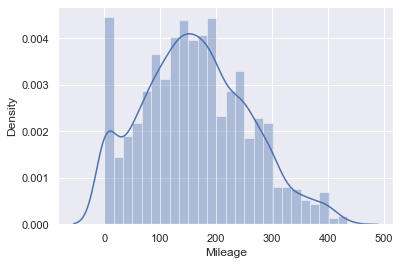

In [16]:
sns.distplot(data_2['Mileage'])

C:\Users\Protick\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

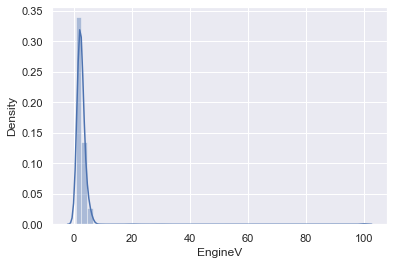

In [17]:
sns.distplot(data_no_mv['EngineV'])

An interval where engine volume should normally fall is 0.6 to 6.5

A common way to label missing values is by assigning 99.99

In [18]:
data_3 = data_2[data_2['EngineV']<6.5]

C:\Users\Protick\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

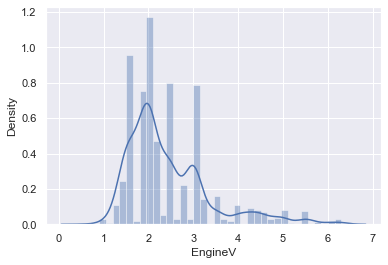

In [19]:
sns.distplot(data_3['EngineV'])

C:\Users\Protick\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

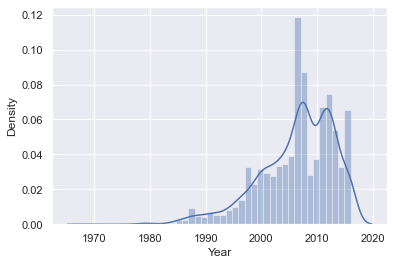

In [20]:
sns.distplot(data_no_mv['Year'])

In [21]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

C:\Users\Protick\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

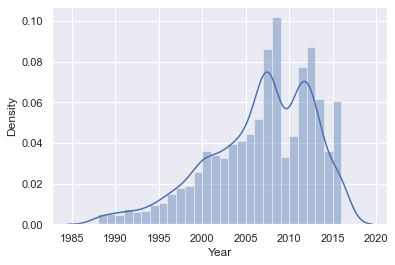

In [22]:
sns.distplot(data_4['Year'])

Currently the indices refer to all the data (including the observations we removed)

In [23]:
data_cleaned = data_4.reset_index(drop=True)

In [24]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3826,3826.000000,3826,3826.000000,3826.000000,3826,3826,3826.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1454,NaN,NaN,1772,3464,NaN
mean,NaN,17171.386333,NaN,162.166231,2.441777,NaN,NaN,2006.615787
std,NaN,16396.219278,NaN,94.831169,0.947973,NaN,NaN,6.067533
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,94.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,159.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21000.000000,NaN,227.000000,3.000000,NaN,NaN,2011.000000


## Checking the OLS assumptions

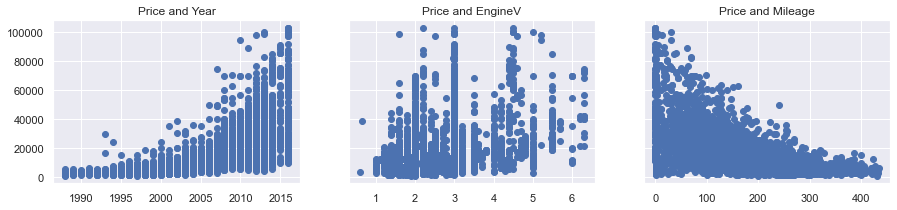

In [25]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

C:\Users\Protick\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

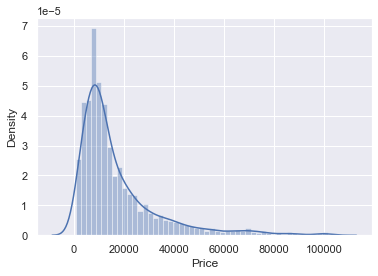

In [26]:
sns.distplot(data_cleaned['Price'])

### Relaxing the assumptions

Log transformations are especially useful when facing exponetial relationships.

In [27]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3821,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007,8.824678
3822,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3823,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3824,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


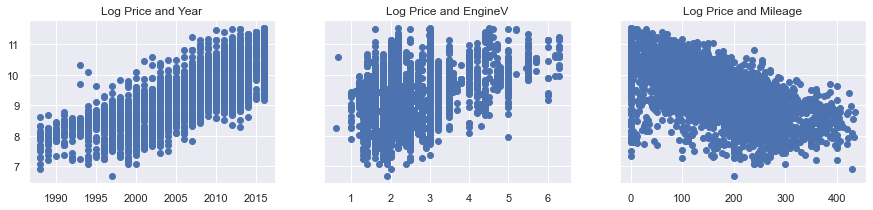

In [28]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

In [29]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicollinearity

In [30]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

One of the best ways to check for multicollinearity is through VIF(variance inflation factor)

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

VIF = 1 : no multicollinearity

1< VIF <5 : perfectly okay

10 < VIF : unacceptable

It so rare to find data so perfect tthat all features have VIF < 5

In [32]:
vif

,VIF,features
0,3.899033,Mileage
1,10.307533,Year
2,7.637076,EngineV


In [33]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

## Create dummy variables

If we have N categories for a feature, we have to create N-1 dummies

In [34]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [35]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Rearrange a bit

In [36]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [37]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [38]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear Regression Model

### Declare the inputs and the targets

In [39]:
targets= data_preprocessed['log_price']
inputs= data_preprocessed.drop(['log_price'],axis=1)

### Scale the data

In [40]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [41]:
inputs

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3821,152,1.6,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
3822,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3823,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3824,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


it is not usually recommended to standardize dummy variables. Scalling has no effect on the predictive power of dummies once scaled, though, they lose all their dummy meaning.

In [42]:
inputs_scaled= scaler.transform(inputs)

In [43]:
inputs

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3821,152,1.6,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
3822,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3823,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3824,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


### Train Test Split

x_train, x_test = inputs_scaled (80%), inputs_scaled (20%)

y_train, y_test = targets (80%), targets (20%)

when we split x and y using the train_test_split, their elements are shuffled in the same way.

In [44]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, 
                                                    targets, 
                                                    test_size= 0.2, 
                                                    random_state= 365)

### Create the regression

This is a log-linear regression as the dependent variable is the log of 'Price'

In [45]:
reg= LinearRegression()
reg.fit(x_train , y_train)

LinearRegression()

In [46]:
y_hat= reg.predict(x_train)

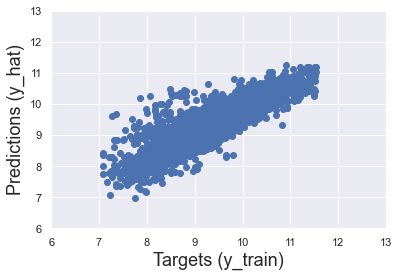

In [47]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Residuals= Differences between the targets and the predictions.

C:\Users\Protick\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

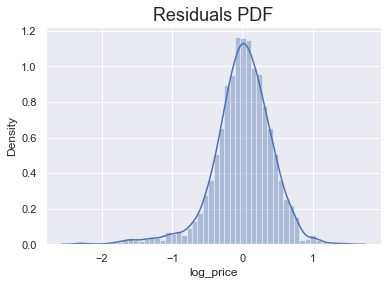

In [48]:
sns.distplot(y_train - y_hat)
plt.title('Residuals PDF', size=18)

In [49]:
# r-square
reg.score(x_train, y_train)

0.7494553293190431

### Finding the weights and bias

In [50]:
reg.intercept_

9.387782816691688

In [51]:
reg.coef_

array([-0.43588103,  0.20992556,  0.00349   , -0.00918508, -0.14030828,
       -0.1805565 , -0.06326013, -0.09911693, -0.14571937, -0.09759722,
       -0.19919649, -0.1326728 , -0.16230903, -0.11548866, -0.02457821,
       -0.14279025,  0.31416213])

In [52]:
reg_summary= pd.DataFrame(inputs.columns.values, columns=['Features'])

In [53]:
reg_summary['weights']= reg.coef_

In [54]:
reg_summary

,Features,weights
0,Mileage,-0.435881
1,EngineV,0.209926
2,Brand_BMW,0.003490
3,Brand_Mercedes-Benz,-0.009185
4,Brand_Mitsubishi,-0.140308
5,Brand_Renault,-0.180556
6,Brand_Toyota,-0.063260
7,Brand_Volkswagen,-0.099117
8,Body_hatch,-0.145719
9,Body_other,-0.097597


In [55]:
from sklearn.feature_selection import f_regression

f_regression(inputs_scaled,targets)

(array([2159.78573101,  753.38945866,   36.40616949,   29.65960358,
          21.9968722 ,  168.62532546,  101.71979073,   34.80497048,
          72.13611462,    7.56868758,   70.12337725,  123.21969059,
          55.34642001,   24.01701466,    2.88836203,   12.25172664,
        1090.42290686]),
 array([0.00000000e+000, 1.49524702e-151, 1.75419940e-009, 5.47374612e-008,
        2.82634060e-006, 9.18577056e-038, 1.25961907e-023, 3.96058982e-009,
        2.83678032e-017, 5.96707460e-003, 7.72281960e-017, 3.35146582e-028,
        1.24105485e-013, 9.94481957e-007, 8.93029229e-002, 4.70135159e-004,
        1.30592092e-210]))

In [56]:
p_values=f_regression(inputs_scaled,targets)[1]

### weights interpretation

I. Continuous variables:

1. A positive weight shows that as a 'Feature' increases in value, 'log_price' and 'price' increases respectively.

2. A negative weight shows that as a 'Feature' decreases in value, 'log_price' and 'price' decreases respectively.

II. Dummy Variables:

1. A positive weight shows that the respective category(Brand) is more expensive than the benchmark(Audi)
2. A negative weight shows that the respective category(Brand) is less expensive than the benchmark(Audi)

Dummies are only compared to their respective benchmark.

In [57]:
reg_summary['p-value']= p_values.round(4)
reg_summary

,Features,weights,p-value
0,Mileage,-0.435881,0.0000
1,EngineV,0.209926,0.0000
2,Brand_BMW,0.003490,0.0000
3,Brand_Mercedes-Benz,-0.009185,0.0000
4,Brand_Mitsubishi,-0.140308,0.0000
5,Brand_Renault,-0.180556,0.0000
6,Brand_Toyota,-0.063260,0.0000
7,Brand_Volkswagen,-0.099117,0.0000
8,Body_hatch,-0.145719,0.0000
9,Body_other,-0.097597,0.0060


In [58]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

## Testing

In [59]:
y_hat2= reg.predict(x_test)

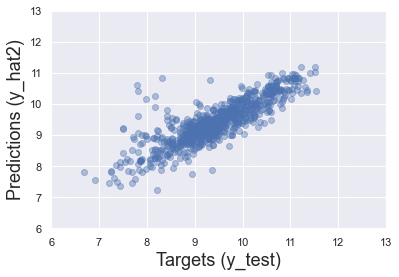

In [60]:
# alpha: specifies the opacity
plt.scatter(y_test, y_hat2, alpha= 0.4)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat2)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

C:\Users\Protick\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

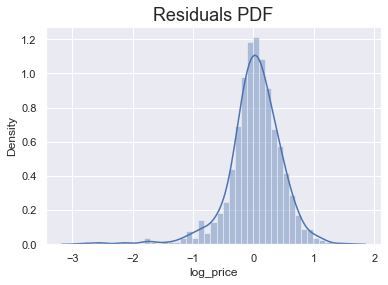

In [61]:
sns.distplot(y_test - y_hat2)
plt.title('Residuals PDF', size=18)

In [62]:
reg.score(x_test, y_test)

0.7135532438921324

if we take the exponentials of the log prices, we will reach the original prices

exp(ln(x)) = |x| 

(for a positive x)
log(exp(x)) = x

In [63]:
df_pf= pd.DataFrame(y_hat2, columns=['Prediction'])
df_pf.head()

,Prediction
0,9.732224
1,8.033775
2,9.525085
3,9.473518
4,9.871273


np.exp(x) returns the exponential of x (the Euler number 'e' to the power of x)

In [64]:
df_pf= pd.DataFrame(np.exp(y_hat2), columns=['Prediction'])
df_pf.head()

,Prediction
0,16851.982021
1,3083.358207
2,13699.093320
3,13010.578900
4,19365.981091


In [65]:
df_pf['Target']= np.exp(y_test)
df_pf

,Prediction,Target
0,16851.982021,NaN
1,3083.358207,7900.0
2,13699.093320,NaN
3,13010.578900,NaN
4,19365.981091,NaN
...,...,...
761,8509.446944,NaN
762,29052.144626,2700.0
763,11875.503539,NaN
764,6517.014266,NaN


In [66]:
y_test = y_test.reset_index(drop=True)

In [67]:
df_pf['Target']= np.exp(y_test)
df_pf

,Prediction,Target
0,16851.982021,24700.0
1,3083.358207,4000.0
2,13699.093320,18300.0
3,13010.578900,15600.0
4,19365.981091,14200.0
...,...,...
761,8509.446944,6900.0
762,29052.144626,26500.0
763,11875.503539,14899.0
764,6517.014266,5000.0


In [68]:
df_pf['Residual']= df_pf['Target'] - df_pf['Prediction']

In [69]:
df_pf['Difference%']= np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,16851.982021,24700.0,7848.017979,31.773352
1,3083.358207,4000.0,916.641793,22.916045
2,13699.093320,18300.0,4600.906680,25.141567
3,13010.578900,15600.0,2589.421100,16.598853
4,19365.981091,14200.0,-5165.981091,36.380149
...,...,...,...,...
761,8509.446944,6900.0,-1609.446944,23.325318
762,29052.144626,26500.0,-2552.144626,9.630734
763,11875.503539,14899.0,3023.496461,20.293285
764,6517.014266,5000.0,-1517.014266,30.340285


In [70]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,766.000000,766.000000,766.000000,766.000000
mean,15647.946469,17806.382337,2158.435868,40.300582
std,11777.347449,16381.051873,8892.745562,100.364196
min,1384.119982,800.000000,-46435.411864,0.004309
25%,7935.645334,7500.000000,-1540.623607,10.590275
50%,11920.597364,12050.000000,383.638861,22.786415
75%,19361.075726,21875.000000,4078.976186,39.612236
max,72308.135646,102800.000000,69934.504005,1567.519481


In [71]:
pd.options.display.max_rows= 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
594,23997.97,23999.00,1.03,0.00
665,23997.97,23999.00,1.03,0.00
130,8909.76,8910.53,0.77,0.01
443,7494.92,7500.00,5.08,0.07
600,51151.02,51000.00,-151.02,0.30
210,12943.23,12900.00,-43.23,0.34
233,15053.65,15000.00,-53.65,0.36
139,5578.51,5600.00,21.49,0.38
7,8545.00,8500.00,-45.00,0.53
506,43762.09,44000.00,237.91,0.54


How to improve our model:
1. Use a different set of variables
2. Remove a bigger part o the outliers
3. Use different kinds of transformation like log , standardization.

***

***

***

# EXERCISE

### Part 1
Calculate the variance inflation factors for all variables contained in data_preprocessed. Anything strange?

### Part 2
As mentioned in the lecture, your task is to calculate the variance inflation factor (VIF) of all variables including the dummies (but without the dependent variable).

### Part 3
Now calculate the VIFs for a data frame where we include the dummies, without 'log_price', but DO NOT DROP THE FIRST DUMMY. Anything strange now?

***

### Part 1 - Solution

In [72]:
# Let's simply use the data_preprocessed and the VIF code from above
variables = data_preprocessed
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,42.22,log_price
1,4.58,Mileage
2,13.36,EngineV
3,2.59,Brand_BMW
4,2.99,Brand_Mercedes-Benz
5,1.83,Brand_Mitsubishi
6,2.28,Brand_Renault
7,2.40,Brand_Toyota
8,3.32,Brand_Volkswagen
9,1.59,Body_hatch


Obviously, 'log_price' has a very high VIF. This implies it is most definitely **linearly correlated** with all the other variables. And this is no surprise! We are using a linear regression to determine 'log_price' given values of the independent variables! This is exactly what we expect - a linear relationship!

However, to actually assess multicollinearity for the predictors, we have to drop 'log_price'. The multicollinearity assumption refers only to the idea that the **independent variables** shoud not be collinear.

### Part 2 - Solution

In [73]:
# Let's simply drop log_price from data_preprocessed
variables = data_preprocessed.drop(['log_price'],axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,4.58,Mileage
1,7.80,EngineV
2,2.29,Brand_BMW
3,2.81,Brand_Mercedes-Benz
4,1.64,Brand_Mitsubishi
5,2.09,Brand_Renault
6,2.16,Brand_Toyota
7,2.85,Brand_Volkswagen
8,1.47,Body_hatch
9,1.55,Body_other


As you can see, all VIFs are pretty much acceptable. The ones that are particularly high are 'EngineV' and 'Registration_yes'. 

We already discussed 'EngineV' in the lecture.

In the case of registration, the main issue is that **most values are 'yes'** so all types of problems come from there. One way this imbalance manifests is in multicollinearity. Remember that all independent variables are pretty good at determining 'log_price'? Well, if 'registration' is always 'yes', then if we predict 'log_price' we are predicting registration, too (it is going to be 'yes'). That is why, whenever a single category is so predominant, we may just drop the variable. 

Note that it will most probably be insignificant anyways.

### Part 3 - Solution

In [74]:
# To solve this one, we must create a new variable with dummies, without dropping the first one
data_with_dummies_new = pd.get_dummies(data_no_multicollinearity)#, drop_first=True)
data_with_dummies_new.head()

,Mileage,EngineV,log_price,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,277,2.00,8.34,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,427,2.90,8.97,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,358,5.00,9.50,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,240,4.20,10.04,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,120,2.00,9.81,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


In [75]:
# Let's simply drop 'log_price' from this new variable
variables = data_with_dummies_new.drop(['log_price'],axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

C:\Users\Protick\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,features
0,1.27,Mileage
1,1.57,EngineV
2,inf,Brand_Audi
3,inf,Brand_BMW
4,inf,Brand_Mercedes-Benz
5,inf,Brand_Mitsubishi
6,inf,Brand_Renault
7,inf,Brand_Toyota
8,inf,Brand_Volkswagen
9,inf,Body_crossover


The result that we get is that very interesting indeed. Most VIFs are equal to **inf**, or plus infinity. 

We even got an warning: *RuntimeWarning: divide by zero encountered in double_scalars, vif = 1. / (1. - r_squared_i)*

The main reason is what we've discussed before. When a car is an 'Audi' all other brand dummies are 0. When a car is not 'Audi', at least one of them will be 1. By including all dummies have introduced multicollinearity (**perfect multicollinearity**)!!! 

If we run a regression including all these dummies, the coefficients would be inflated and completely off-mark. 

Now you see why we need to drop one of the dummy variables for each feature.